In [1]:
import pandas as pd
import numpy as np
import re, pprint

pd.set_option('max_colwidth', 80)

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

import pyLDAvis
import pyLDAvis.sklearn

In [2]:
from pymongo import MongoClient
client = MongoClient()
db = client.steamreviews

In [3]:
reviewlist = list(db.roguelikes.find({'voted_up':False},{'_id':0}))

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:771: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _query_uncompressed(options, collection_name, num_to_skip,
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:771: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _query_uncompressed(options, collection_name, num_to_skip,
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:771: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _query_uncompressed(options, collection_name, num_to_skip,
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:771: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _query_uncompressed(options, collection_name, num_to_skip,
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: Dep

In [4]:
reviewlist

[{'recommendationid': '64054120',
  'author': {'steamid': '76561198844168734',
   'num_games_owned': 6,
   'num_reviews': 1,
   'playtime_forever': 702,
   'playtime_last_two_weeks': 702,
   'last_played': 1582558928},
  'language': 'english',
  'review': "Would be a great game, if it didn't have so many bugs and didn't crash so often for so many people.. 11 bit studios haven't fixed this issue in 5 years and I doubt they ever will. Strongly considering a refund as I bought the first release back in November of 2014 and thought it would be a completely different story now in 2020 with it being an expanded version and considerably more expensive etc. Oh, how wrong I was. Just take a look at the discussion forums on this issue. Not impressed at all, Especially since I lose progress time and time again.",
  'timestamp_created': 1582559185,
  'timestamp_updated': 1582559185,
  'voted_up': False,
  'votes_up': 0,
  'votes_funny': 0,
  'weighted_vote_score': 0,
  'comment_count': 0,
  'steam

In [5]:
reviewsonly = []
for i in range(len(list(reviewlist[:][:]))):
    reviewsonly.append(list(reviewlist[:][i].values())[3])

In [6]:
reviewsonly

["Would be a great game, if it didn't have so many bugs and didn't crash so often for so many people.. 11 bit studios haven't fixed this issue in 5 years and I doubt they ever will. Strongly considering a refund as I bought the first release back in November of 2014 and thought it would be a completely different story now in 2020 with it being an expanded version and considerably more expensive etc. Oh, how wrong I was. Just take a look at the discussion forums on this issue. Not impressed at all, Especially since I lose progress time and time again.",
 'i played this for over 700 hrs without a hiccup. gave it a break for a few months now it crashes on start up. since the last update it wont play. hate to see anyone else waste money on something which wont play',
 "A game that's meant to get you to experience a different side of war but instead makes you frustrated at inventory management.",
 "The developers described this an interview that they took great pains to avoid making another

In [7]:
#df = pd.read_csv('reviewsonly.csv')
#print(df['0'].unique())

In [8]:
#sample_df = df.sample(2000, random_state=12)

In [9]:
#for i in range(len(sample_df['0'])):
#    sample_df['0'].iloc[i] = str(sample_df['0'].iloc[i]).encode(encoding='UTF-8',errors='strict')

In [10]:
#sample_df.head()

In [11]:
#sample_df['0'].iloc[0] = 'insanely addicting'

In [12]:
from sklearn.feature_extraction import text 

#stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [13]:
my_additional_stop_words = ['game','just','like','play','don','time','fun','make','good',
                           'way', 'really','things','lot','getting','hours','playing',
                           'games','want','bad','point','thing','isn','little','great',
                           'doesn','got','isaac','darkest','does','people','going',
                            'actually','start','feels','need','use','pretty','review',
                            'dont','recommend','shit','fuck','fucking']

In [14]:
#vectorizer = CountVectorizer(analyzer='word',       
#                             min_df=5,                        # minimum reqd occurences of a word 
#                             stop_words=text.ENGLISH_STOP_WORDS.union(my_additional_stop_words),             # remove stop words
#                             lowercase=True,                   # convert all words to lowercase
#                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
#                             max_features=1000,             # max number of uniq words
#                            )
#
#data_vectorized = vectorizer.fit_transform(reviewsonly)

In [15]:
vectorizer = TfidfVectorizer(analyzer='word',       
                             min_df=5,                        # minimum reqd occurences of a word 
                             stop_words=text.ENGLISH_STOP_WORDS.union(my_additional_stop_words),             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=1000,             # max number of uniq words
                            )
data_vectorized = vectorizer.fit_transform(reviewsonly)

In [138]:
data_vectorized

<26270x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 533828 stored elements in Compressed Sparse Row format>

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [16]:
#data_vectorized.shape
#type(data_vectorized)

In [17]:
n_components = 10

lda_model = LatentDirichletAllocation(n_components=n_components,   # Number of topics
                                      max_iter=10,                 # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,            # Random state
                                      #batch_size=128,             # n docs in each learning iter
                                      n_jobs = -1,                 # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [18]:
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  72.595506
6       0.648955  71.707100       2        1   3.818608
8      71.019684   9.971006       3        1   3.757533
2       3.785981  33.185135       4        1   3.317519
3     -42.666500  -9.222070       5        1   3.221200
0      -3.621689 -43.526516       6        1   2.903741
4      -3.632402  -4.171708       7        1   2.781777
1     -36.584400  35.804413       8        1   2.693217
7      44.391380  50.615383       9        1   2.480894
5      40.235809 -31.591665      10        1   2.430006, topic_info=          Term        Freq       Total Category  logprob  loglift
80      boring  883.000000  883.000000  Default  30.0000  30.0000
102        buy  662.000000  662.000000  Default  29.0000  29.0000
571      money  508.000000  508.000000  Default  28.0000  28.0000
183    crashes  481.000000  481.000000  Default  27.0000  27.0000
404       hard  502.000000  502.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
33       arena    0.321074   42.330632  Topic10  -8.8483  -1.1643
432  hopefully    0.321040   35.041969  Topic10  -8.8484  -0.9755
553    mention    0.320974   42.686171  Topic10  -8.8486  -1.1730
205    decided    0.320967   61.250773  Topic10  -8.8486  -1.5341
394       guns    0.320963   50.997676  Topic10  -8.8486  -1.3509

[401 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         1  0.507438  absolute
4         7  0.453069  absolute
6         1  0.324978    access
6         2  0.666621    access
9         1  0.309974    acting
...     ...       ...       ...
995       2  0.679203      year
996       1  0.352233     years
996       2  0.639890     years
998       1  0.386631   youtube
998       6  0.587106   youtube

[665 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 9, 3, 4, 1, 5, 2, 8, 6])

In [19]:
ex_label = [e[:30]+"..." for e in reviewsonly]

In [143]:
wordvec = pd.DataFrame(data_vectorized.toarray(), index=ex_label, columns=vectorizer.get_feature_names()).reset_index()

In [144]:
wordvec.drop('index',axis=1,inplace=True)

In [147]:
wordvec

,100,abilities,ability,able,absolute,absolutely,access,achievements,act,acting,...,wouldn,write,writing,wrong,yeah,year,years,yes,youtube,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.184181,0.0,0.000000,0.196437,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.118927,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.449358,0.0
26266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
26267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
26268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0


C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [146]:
#wordvec.to_csv('wordvec.csv')

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [21]:

nmf_model = NMF(7)
doc_topic = nmf_model.fit_transform(data_vectorized)

In [22]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             columns = vectorizer.get_feature_names())
topic_word

,100,abilities,ability,able,absolute,absolutely,access,achievements,act,acting,...,wouldn,write,writing,wrong,yeah,year,years,yes,youtube,zero
0,0.142,0.153,0.140,0.274,0.050,0.174,0.128,0.052,0.062,0.065,...,0.143,0.051,0.102,0.211,0.086,0.065,0.093,0.168,0.048,0.086
1,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.007,0.000,0.005,0.000,0.005,0.000,0.000,0.000,0.014,0.000
2,0.029,0.000,0.000,0.000,0.010,0.010,0.000,0.013,0.011,0.000,...,0.034,0.012,0.001,0.020,0.031,0.032,0.028,0.029,0.016,0.001
3,0.000,0.000,0.000,0.015,0.000,0.007,0.000,0.007,0.000,0.000,...,0.010,0.000,0.000,0.019,0.000,0.000,0.000,0.000,0.012,0.006
4,0.056,0.009,0.011,0.003,0.013,0.018,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.024,0.006,0.000,0.000,0.004,0.002,0.006
5,0.001,0.000,0.005,0.131,0.002,0.018,0.052,0.022,0.014,0.000,...,0.061,0.013,0.004,0.032,0.021,0.100,0.126,0.031,0.023,0.018
6,0.005,0.000,0.000,0.003,0.035,0.013,0.562,0.016,0.003,0.002,...,0.038,0.017,0.034,0.005,0.020,0.103,0.139,0.020,0.010,0.009


In [149]:
topic_word.transpose().to_csv('asdfghjkl.csv')

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [23]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [99]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
combat, enemies, level, feel, gameplay, items, run, character, die, better

Topic  1
boring, gets, repetitive, fast, gameplay, slow, quickly, kinda, hour, tedious

Topic  2
buy, dlc, sucks, sale, rebirth, instead, unless, devs, bought, better

Topic  3
hard, easy, difficulty, mode, sucks, unfair, beat, level, difficult, enjoy

Topic  4
rng, based, luck, party, dungeon, skill, stress, strategy, grind, difficulty

Topic  5
work, multiplayer, controller, refund, fix, support, online, crashes, bugs, steam

Topic  6
worth, money, waste, price, content, early, access, sale, bought, devs


C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [25]:
#nmf with 7 and tfidf swears removed
#Topic 0  = Essay Reviews, Combat/Gameplay
#Topic 1  = Boring/repetitive
#Topic 2  = Do not Buy
#Topic 3  = Difficulty
#Topic 4  = RNG/Luck
#Topic 5  = Issues/support
#Topic 6  = Price/Not Worth

In [26]:
#nmf with 8 and tfidf swears removed
#Topic 0  = Combat/Gameplay
#Topic 1  = Boring/repetitive
#Topic 2  = Do not Buy
#Topic 3  = Difficulty
#Topic 4  = RNG/Luck
#Topic 5  = Issues/support
#Topic 6  = Not Worth
#Topic 7  = Price

In [27]:
#nmf with 8 and tfidf
#Topic 0  = Combat
#Topic 1  = Boring/repetitive
#Topic 2  = 
#Topic 3  = RNG/Luck
#Topic 4  = Difficulty
#Topic 5  = Rage Reviews
#Topic 6  = Issues/support
#Topic 7  = Price


In [28]:
#nmf with 10 and tfidf
#Topic 0  = Combat
#Topic 1  = Boring/repetitive
#Topic 2  = 
#Topic 3  = RNG/Luck
#Topic 4  = Difficulty
#Topic 5  = Rage Reviews
#Topic 6  = Issues/support
#Topic 7  = Price
#Topic 8  = Price
#Topic 9  = lack of diversity

In [29]:
#nmf with 10
#Topic 0  = Early/First Impressions/Gameplay
#Topic 1  = Game Mechanics/Gameplay
#Topic 2  = Darkest Dungeon
#Topic 3  = Content
#Topic 4  = Enemies
#Topic 5  = Combat
#Topic 6  = randomness
#Topic 7  = Items/loot
#Topic 8  = Run variance and upgrades
#Topic 9  = Loss of Progress/Difficulty


In [30]:
#nmf with 11
#Topic 0  = Early/First Impressions
#Topic 1  = Game Mechanics/Gameplay
#Topic 2  = Darkest Dungeon
#Topic 3  = Content
#Topic 4  = Enemies
#Topic 5  = Combat
#Topic 6  = randomness
#Topic 7  = Items/loot
#Topic 8  = Run variance and upgrades
#Topic 9  = Loss of Progress
#Topic 10 = Difficulty


In [31]:

doc_topic_nmf = pd.DataFrame(doc_topic.round(5),
                             index = ex_label)
doc_topic_nmf

,0,1,2,3,4,5,6
"Would be a great game, if it d...",0.02277,0.00000,0.00162,0.00000,0.00000,0.04397,0.00959
i played this for over 700 hrs...,0.00000,0.00000,0.00057,0.00108,0.00126,0.02937,0.05447
A game that's meant to get you...,0.02179,0.00000,0.00197,0.00000,0.00000,0.00000,0.00000
The developers described this ...,0.03614,0.01743,0.01821,0.03461,0.00000,0.00721,0.01117
"After a day or so, the game ju...",0.01962,0.00000,0.00028,0.00070,0.00000,0.00636,0.00000
...,...,...,...,...,...,...,...
See my video here - https://ww...,0.00604,0.00080,0.00281,0.00000,0.00029,0.00820,0.00162
Game is pretty bad. The local ...,0.02376,0.00000,0.00000,0.00070,0.00000,0.00817,0.02008
Do NOT buy this game. It's an ...,0.00000,0.00000,0.12222,0.00000,0.00000,0.00000,0.09645
absolutly horrible\n...,0.00199,0.00002,0.00182,0.00000,0.00250,0.00351,0.00190


In [124]:
tpcdf = doc_topic_nmf.reset_index()

In [125]:
tpcdf.rename(columns={0:'Combat/Gameplay,Misc.',
                      1:'Boring/repetitive',
                      2:'Do not Buy',
                      3:'Difficulty',
                      4:'RNG/Luck',
                      5:'Issues/support',
                      6:'Price/Not Worth'}, 
                 inplace=True)
#nmf with 7 and tfidf swears removed
#Topic 0  = Essay Reviews, Combat/Gameplay/Content
#Topic 1  = Boring/repetitive
#Topic 2  = Do not Buy
#Topic 3  = Difficulty
#Topic 4  = RNG/Luck
#Topic 5  = Issues/support
#Topic 6  = Price/Not Worth

In [154]:
tpcdf.sum()

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


index                    Would be a great game, if it d...i played this for over 700 hrs...A game tha...
Combat/Gameplay,Misc.                                                                            521.536
Boring/repetitive                                                                                180.845
Do not Buy                                                                                       135.344
Difficulty                                                                                       124.462
RNG/Luck                                                                                         151.171
Issues/support                                                                                   273.338
Price/Not Worth                                                                                   245.06
dtype: object

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [152]:
for i in tpcdf.columns:
    print(i,np.argmax(tpcdf[i]))

index 11814
Combat/Gameplay,Misc. 18079
Boring/repetitive 9
Do not Buy 3916
Difficulty 275
RNG/Luck 4077
Issues/support 15563
Price/Not Worth 3520


C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


In [153]:
reviewlist[18079]

{'recommendationid': '24322648',
 'author': {'steamid': '76561198036538519',
  'num_games_owned': 520,
  'num_reviews': 18,
  'playtime_forever': 295,
  'playtime_last_two_weeks': 0,
  'last_played': 1473200658},
 'language': 'english',
 'review': 'I really wanted to enjoy Necropolis. The idea of a Roguelite with Dark Souls-like combat sounded really enticing. Unfortunately the game does not live up to that hope. At it\'s core it has the possibility to be a great game. Maybe even one of the best Roguelikes out there.  At the moment though, the game is horribly unfinished and not worthy of the $30 price tag. There is only one type of class; a sword n\' board playstyle that can get dull quickly. It doesn\'t help that there are only like four different weapon types, all of which don\'t have much significant differences in playstyle. The combat  and animations also feel floaty and unsatisfying. Along with that the weapons feel like foam swords because higher level enemies absorb a ridiculo

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [127]:
doc_topic_nmf.sum()

0    521.53646
1    180.84479
2    135.34358
3    124.46244
4    151.17109
5    273.33788
6    245.06013
dtype: float64

In [128]:
tpcdf.sum()

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


index                    Would be a great game, if it d...i played this for over 700 hrs...A game tha...
Combat/Gameplay,Misc.                                                                            521.536
Boring/repetitive                                                                                180.845
Do not Buy                                                                                       135.344
Difficulty                                                                                       124.462
RNG/Luck                                                                                         151.171
Issues/support                                                                                   273.338
Price/Not Worth                                                                                   245.06
dtype: object

In [39]:
#tpcdf.sort_values(0).tail(30)

In [40]:
#reviewlist[4083]

In [41]:
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [42]:
X = StandardScaler().fit_transform(tpcdf.drop('index',axis=1))

In [43]:
from collections import Counter

In [44]:
#db = DBSCAN(eps=.75, min_samples=3).fit(X)
#labels = db.labels_
#Counter(labels)

In [131]:
tpcdf.sum()

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


index                    Would be a great game, if it d...i played this for over 700 hrs...A game tha...
Combat/Gameplay,Misc.                                                                            521.536
Boring/repetitive                                                                                180.845
Do not Buy                                                                                       135.344
Difficulty                                                                                       124.462
RNG/Luck                                                                                         151.171
Issues/support                                                                                   273.338
Price/Not Worth                                                                                   245.06
dtype: object

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


Text(0.5, 1.0, 'Training Topic Dist.')

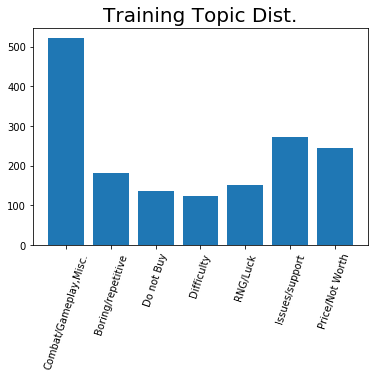

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [156]:
plt.bar(tpcdf.sum().index[1:],tpcdf.sum().values[1:])
plt.xticks(rotation=72)
plt.title('Training Topic Dist.', fontsize=20)

In [46]:
hsiege = list(db.Hsiegetest.find({'voted_up':False},{'_id':0}))

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


In [47]:
hsiegedf = pd.DataFrame(hsiege)

In [48]:
from datetime import datetime
#ts = int("1391127925")
## if you encounter a "year is out of range" error the timestamp
## may be in milliseconds, try `ts /= 1000` in that case
#print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

In [49]:
dt = []
for unixdate in hsiegedf.timestamp_updated:
    dt.append(datetime.utcfromtimestamp(int(unixdate)).strftime('%Y-%m-%d %H:%M:%S'))
hsiegedf['datetime']=dt

yearmonth = []
for item in hsiegedf['datetime']:
    yearmonth.append(pd.to_datetime(item).strftime('%Y/%m'))
hsiegedf['YrMon'] = yearmonth

In [50]:
#hsiegedf['datetime']=dt
#pd.to_datetime(hsiegedf['datetime'][1]).strftime('%Y/%m')

In [51]:
hsiegedf['YrMon'] = yearmonth

In [52]:
hsiegedf.drop(['recommendationid','author','language','voted_up','votes_up',
               'votes_funny','weighted_vote_score','comment_count','steam_purchase',
               'received_for_free','timestamp_dev_responded','developer_response',
               'written_during_early_access','timestamp_created'],axis = 1, inplace=True)

In [155]:
hsiegedf.tail()

,review,timestamp_updated,datetime,YrMon,SEASON,Year
0,Please don't support misogynists and racists. There too many other good game...,1582581849,2020-02-24 22:04:09,2020/02,Winter,2020
1,Not a fun or particularly good game. The company is also impossible to suppo...,1582537361,2020-02-24 09:42:41,2020/02,Winter,2020
2,"Yeah didn't really like the game back in the day, and now this:\n\nhttps://t...",1582524665,2020-02-24 06:11:05,2020/02,Winter,2020
3,mediocre game made by a massive racist who openly said that he'd make sure e...,1582501638,2020-02-23 23:47:18,2020/02,Winter,2020
4,https://twitter.com/heyitsnasse/status/1231139328102936576?s=21,1582494532,2020-02-23 21:48:52,2020/02,Winter,2020
...,...,...,...,...,...,...
1650,This game doesnt not worth $9.99 It has no story and I think it's not a read...,1391127925,2014-01-31 00:25:25,2014/01,Winter,2014
1651,Racist developer,1582815365,2020-02-27 14:56:05,2020/02,Winter,2020
1652,https://screenrant.com/panic-art-studios-statement-ceo-racist-rant/\n\nHow r...,1582731041,2020-02-26 15:30:41,2020/02,Winter,2020
1653,CEO of dev company is extremely racist.,1582684828,2020-02-26 02:40:28,2020/02,Winter,2020


C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [55]:
doy = []
for day in hsiegedf['datetime']:
    doy.append(pd.Period(day, freq='D').dayofyear)
doy = np.array(doy)

In [56]:
bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
#doy = hsiegedf['datetime'].dayofyear
hsiegedf['SEASON'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)

In [57]:
year = []
for item in hsiegedf['datetime']:
    year.append(pd.to_datetime(item).strftime('%Y'))
hsiegedf['Year'] = year

In [58]:
ex_labeltest = [e[:30]+"..." for e in hsiegedf['review']]

In [59]:
data_vectorizedtest = vectorizer.transform(hsiegedf['review'])

doc_topictest = nmf_model.transform(data_vectorizedtest)

In [81]:
doc_topic_nmftest = pd.DataFrame(doc_topictest.round(5),
                             index = ex_labeltest).reset_index()
doc_topic_nmftest

,index,0,1,2,3,4,5,6
0,Please don't support misogynis...,0.00404,0.00000,0.00128,0.00099,0.00108,0.03044,0.00000
1,Not a fun or particularly good...,0.00000,0.00000,0.00034,0.00190,0.00029,0.03977,0.00000
2,Yeah didn't really like the ga...,0.01117,0.00000,0.00082,0.00000,0.00000,0.00666,0.00000
3,mediocre game made by a massiv...,0.01032,0.00000,0.06123,0.00010,0.00000,0.01872,0.00000
4,https://twitter.com/heyitsnass...,0.00168,0.00000,0.00004,0.00000,0.00070,0.00206,0.00027
...,...,...,...,...,...,...,...,...
1650,This game doesnt not worth $9....,0.01240,0.00000,0.00000,0.00142,0.00000,0.02616,0.04258
1651,Racist developer...,0.00183,0.00000,0.00021,0.00000,0.00000,0.00685,0.00246
1652,https://screenrant.com/panic-a...,0.00714,0.00033,0.00153,0.00000,0.00049,0.00617,0.00652
1653,CEO of dev company is extremel...,0.00624,0.00197,0.00134,0.00000,0.00000,0.00492,0.00245


In [82]:
doc_topic_nmftest['YearMon'] = hsiegedf['YrMon']
doc_topic_nmftest['Season'] = hsiegedf['SEASON']
doc_topic_nmftest['Year'] = hsiegedf['Year']
doc_topic_nmftest

,index,0,1,2,3,4,5,6,YearMon,Season,Year
0,Please don't support misogynis...,0.00404,0.00000,0.00128,0.00099,0.00108,0.03044,0.00000,2020/02,Winter,2020
1,Not a fun or particularly good...,0.00000,0.00000,0.00034,0.00190,0.00029,0.03977,0.00000,2020/02,Winter,2020
2,Yeah didn't really like the ga...,0.01117,0.00000,0.00082,0.00000,0.00000,0.00666,0.00000,2020/02,Winter,2020
3,mediocre game made by a massiv...,0.01032,0.00000,0.06123,0.00010,0.00000,0.01872,0.00000,2020/02,Winter,2020
4,https://twitter.com/heyitsnass...,0.00168,0.00000,0.00004,0.00000,0.00070,0.00206,0.00027,2020/02,Winter,2020
...,...,...,...,...,...,...,...,...,...,...,...
1650,This game doesnt not worth $9....,0.01240,0.00000,0.00000,0.00142,0.00000,0.02616,0.04258,2014/01,Winter,2014
1651,Racist developer...,0.00183,0.00000,0.00021,0.00000,0.00000,0.00685,0.00246,2020/02,Winter,2020
1652,https://screenrant.com/panic-a...,0.00714,0.00033,0.00153,0.00000,0.00049,0.00617,0.00652,2020/02,Winter,2020
1653,CEO of dev company is extremel...,0.00624,0.00197,0.00134,0.00000,0.00000,0.00492,0.00245,2020/02,Winter,2020


C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


In [83]:
doc_topic_nmftest

,index,0,1,2,3,4,5,6,YearMon,Season,Year
0,Please don't support misogynis...,0.00404,0.00000,0.00128,0.00099,0.00108,0.03044,0.00000,2020/02,Winter,2020
1,Not a fun or particularly good...,0.00000,0.00000,0.00034,0.00190,0.00029,0.03977,0.00000,2020/02,Winter,2020
2,Yeah didn't really like the ga...,0.01117,0.00000,0.00082,0.00000,0.00000,0.00666,0.00000,2020/02,Winter,2020
3,mediocre game made by a massiv...,0.01032,0.00000,0.06123,0.00010,0.00000,0.01872,0.00000,2020/02,Winter,2020
4,https://twitter.com/heyitsnass...,0.00168,0.00000,0.00004,0.00000,0.00070,0.00206,0.00027,2020/02,Winter,2020
...,...,...,...,...,...,...,...,...,...,...,...
1650,This game doesnt not worth $9....,0.01240,0.00000,0.00000,0.00142,0.00000,0.02616,0.04258,2014/01,Winter,2014
1651,Racist developer...,0.00183,0.00000,0.00021,0.00000,0.00000,0.00685,0.00246,2020/02,Winter,2020
1652,https://screenrant.com/panic-a...,0.00714,0.00033,0.00153,0.00000,0.00049,0.00617,0.00652,2020/02,Winter,2020
1653,CEO of dev company is extremel...,0.00624,0.00197,0.00134,0.00000,0.00000,0.00492,0.00245,2020/02,Winter,2020


In [63]:
#doc_topic_nmftest.rename(columns={0:'Essay Reviews, Combat/Gameplay',
#                      1:'Boring/repetitive',
#                      2:'Do not Buy',
#                      3:'Difficulty',
#                      4:'RNG/Luck',
#                      5:'Issues/support',
#                      6:'Price/Not Worth'}, 
#                 inplace=True)

In [84]:
seasonid = []
for season in doc_topic_nmftest['Season']:
    if season == 'Winter':
        seasonid.append(1)
    elif season == 'Spring':
        seasonid.append(2)
    elif season == 'Summer':
        seasonid.append(3)
    elif season == 'Fall':
        seasonid.append(4)
doc_topic_nmftest['Seasonid'] = seasonid

In [85]:
doc_topic_nmftest.iloc[1]['Year']+doc_topic_nmftest.iloc[1]['Season']

'2020Winter'

In [86]:
yearseason = []
for i in range(len(doc_topic_nmftest['Year'])):
    yearseason.append(doc_topic_nmftest.iloc[i]['Year']+doc_topic_nmftest.iloc[i]['Season'])
doc_topic_nmftest['YearSeason'] = yearseason


In [87]:
doc_topic_nmftest['YearSeason']

0       2020Winter
1       2020Winter
2       2020Winter
3       2020Winter
4       2020Winter
           ...    
1650    2014Winter
1651    2020Winter
1652    2020Winter
1653    2020Winter
1654    2020Winter
Name: YearSeason, Length: 1655, dtype: object

In [88]:
#doc_topic_nmftest.groupby(['Year','Seasonid']).sum().reset_index().to_csv('HSiegeSsnl.csv')


In [89]:
#doc_topic_nmftest.to_csv('HSiegenogroup.csv')

In [90]:
dfgb = doc_topic_nmftest.groupby(['YearMon']).sum().reset_index()

In [91]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [92]:
dfgb.max()

YearMon     2020/02
0           0.97649
1           0.46721
2           0.83559
3           0.22644
4           0.05957
5           1.88855
6           1.01472
Seasonid        180
dtype: object

In [93]:
#dfgb.to_csv('HeroSiege.csv')

In [94]:
import seaborn as sns

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(


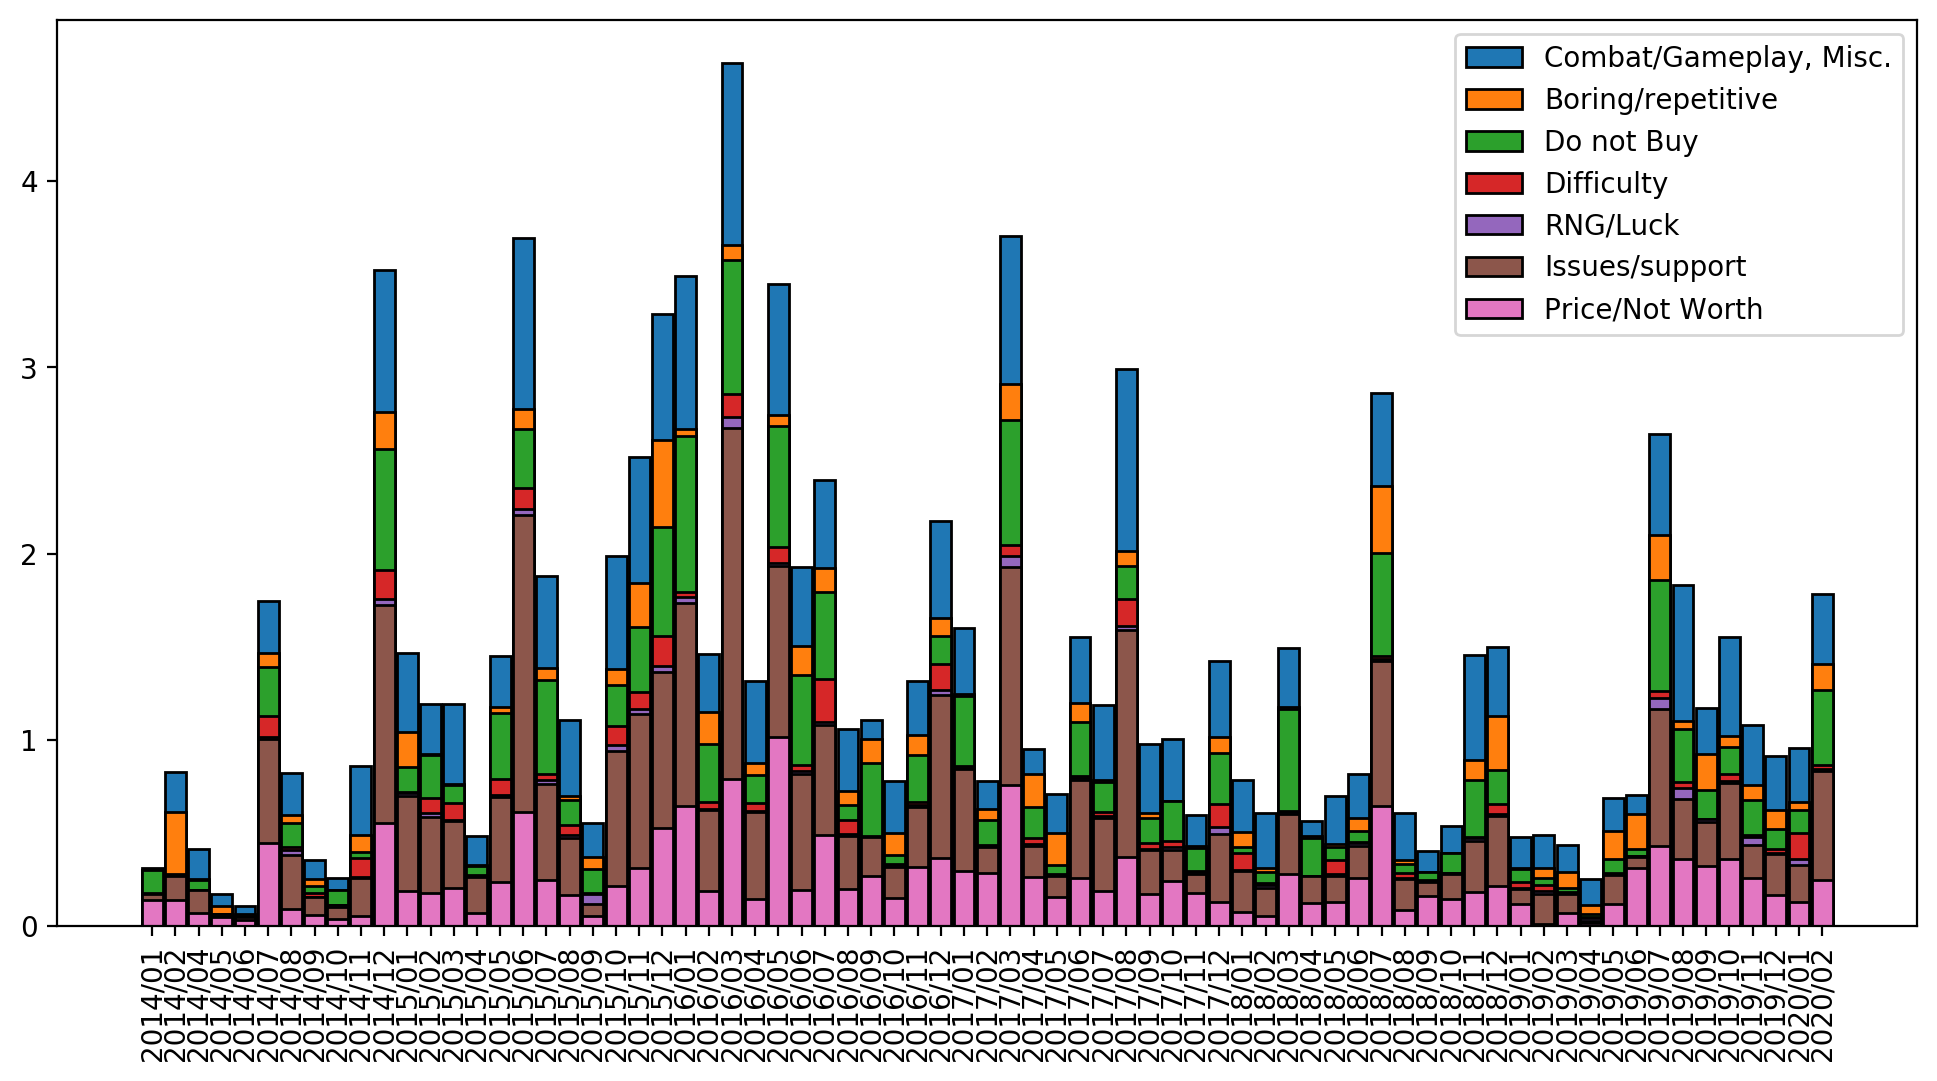

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [98]:
barWidth = .90
figure(num=None, figsize=(12, 6), dpi=200, facecolor='w', edgecolor='k')
plt.bar(dfgb['YearMon'], (dfgb[0]+dfgb[1]+dfgb[2]+dfgb[3]+dfgb[4]+dfgb[5]+dfgb[6]), width=barWidth, edgecolor='black', label='Combat/Gameplay, Misc.')
plt.bar(dfgb['YearMon'], (dfgb[1]+dfgb[2]+dfgb[3]+dfgb[4]+dfgb[5]+dfgb[6]), width=barWidth, edgecolor='black', label='Boring/repetitive')
plt.bar(dfgb['YearMon'], (dfgb[2]+dfgb[3]+dfgb[4]+dfgb[5]+dfgb[6]), width=barWidth, edgecolor='black', label='Do not Buy')
plt.bar(dfgb['YearMon'], (dfgb[3]+dfgb[4]+dfgb[5]+dfgb[6]), width=barWidth, edgecolor='black', label='Difficulty')
plt.bar(dfgb['YearMon'], (dfgb[4]+dfgb[5]+dfgb[6]), width=barWidth, edgecolor='black', label='RNG/Luck')
plt.bar(dfgb['YearMon'], (dfgb[5]+dfgb[6]), width=barWidth, edgecolor='black', label='Issues/support')
plt.bar(dfgb['YearMon'], (dfgb[6]), width=barWidth, edgecolor='black', label='Price/Not Worth')
#sns.barplot(x='YearMon', y=[0,1,2,3,4,5,6], hue=[0,1,2,3,4,5,6], data=dfgb)
plt.xticks(rotation=90)
plt.legend()
plt.show()


KeyError: 0

In [79]:
dfgb

,YearMon,"Essay Reviews, Combat/Gameplay",Boring/repetitive,Do not Buy,Difficulty,RNG/Luck,Issues/support,Price/Not Worth,Seasonid
0,2014/01,0.01439,0.00002,0.12404,0.00142,0.00250,0.02967,0.14093,3
1,2014/02,0.21430,0.33419,0.00604,0.00159,0.00212,0.13072,0.13810,12
2,2014/04,0.15888,0.00512,0.05611,0.00075,0.00206,0.12301,0.06749,10
3,2014/05,0.06897,0.04148,0.00065,0.00000,0.00975,0.00216,0.05038,6
4,2014/06,0.04761,0.00582,0.00654,0.00080,0.00000,0.01762,0.03074,8
...,...,...,...,...,...,...,...,...,...
68,2019/10,0.52743,0.06309,0.14524,0.03541,0.01253,0.40759,0.35862,100
69,2019/11,0.31990,0.08493,0.18668,0.00853,0.04588,0.17486,0.25862,72
70,2019/12,0.29085,0.09825,0.11139,0.01895,0.00613,0.21880,0.16689,59
71,2020/01,0.28858,0.03986,0.12434,0.14239,0.03005,0.19780,0.13085,21


C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib

In [ ]:
hsiegedf.tail(15)

C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib\site-packages\pymongo\message.py:703: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _op_msg_uncompressed(
C:\ProgramData\Anaconda3\envs\notebook-6.0.3_1\lib